<a href="https://colab.research.google.com/github/harmansingh25/ML_Project_2021/blob/main/Copy_of_Stroke_Harman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import sqrt
from google.colab import drive
import sklearn
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.combine import SMOTETomek
import seaborn as sns
from collections import Counter
import warnings
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from numpy import arange
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import log_loss
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostClassifier

Reading the data

In [2]:
warnings.filterwarnings('ignore')
url = "https://raw.githubusercontent.com/harmansingh25/ML_Project_2021/main/Stroke_analysis1%20-%20Stroke_analysis1.csv"
df = pd.read_csv(url)

In [3]:
df

,Unnamed: 0,pid,age,gender,nhiss,mrs,systolic,distolic,glucose,paralysis,smoking,bmi,cholestrol,tos,risk
0,1,PID2829938,61,Male,0,-1,124,80,77,0,0,22,200,-1,0
1,2,PID1833441,75,Male,0,-1,123,82,79,0,0,20,208,-1,0
2,3,PID8745027,73,Male,0,-1,121,83,83,0,0,20,208,-1,0
3,4,PID4568062,63,Female,0,-1,120,85,105,0,0,20,210,-1,0
4,5,PID3855176,23,Male,0,-1,126,81,89,0,0,22,201,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4793,4794,PID11726,67,Male,13,6,180,83,198,1,2,39,219,3,2
4794,4795,PID11727,67,Female,20,3,180,88,188,0,2,22,187,1,2
4795,4796,PID11728,65,Male,6,4,126,111,227,0,3,23,233,3,2
4796,4797,PID11729,64,Male,19,5,126,82,262,2,2,28,244,1,2


Dropping unnecessary columns

In [4]:
df = df.drop(["Unnamed: 0"], axis = 1)
df = df.drop(["pid"], axis = 1)
df = df.rename(columns={"nhiss":"NIHSS_Score", "mrs":"mRS", "distolic":"diastolic"})

# EDA

In [ ]:
df

,age,gender,NIHSS_Score,mRS,systolic,diastolic,glucose,paralysis,smoking,bmi,cholestrol,tos,risk
0,61,Male,0,-1,124,80,77,0,0,22,200,-1,0
1,75,Male,0,-1,123,82,79,0,0,20,208,-1,0
2,73,Male,0,-1,121,83,83,0,0,20,208,-1,0
3,63,Female,0,-1,120,85,105,0,0,20,210,-1,0
4,23,Male,0,-1,126,81,89,0,0,22,201,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4793,67,Male,13,6,180,83,198,1,2,39,219,3,2
4794,67,Female,20,3,180,88,188,0,2,22,187,1,2
4795,65,Male,6,4,126,111,227,0,3,23,233,3,2
4796,64,Male,19,5,126,82,262,2,2,28,244,1,2


In [ ]:
#Printing the shape of the dataset
df.shape

(4798, 13)

In [ ]:
#Describing the dataset
df.describe()

,age,NIHSS_Score,mRS,systolic,diastolic,glucose,paralysis,smoking,bmi,cholestrol,tos,risk
count,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000
mean,47.116090,18.124427,3.674239,153.091705,103.655065,225.846186,1.362026,0.884744,33.739475,217.531055,1.988745,1.879325
std,23.690637,11.274141,1.872073,24.927477,18.344127,56.119071,1.106405,0.903432,6.231687,20.268753,0.973207,0.486878
min,1.000000,0.000000,-1.000000,100.000000,59.000000,70.000000,0.000000,0.000000,18.000000,160.000000,-1.000000,0.000000
25%,28.000000,10.000000,2.000000,132.000000,91.000000,203.000000,0.000000,0.000000,29.000000,205.000000,1.000000,2.000000
50%,49.000000,18.000000,4.000000,154.000000,104.000000,239.000000,1.000000,1.000000,34.000000,219.000000,2.000000,2.000000
75%,66.000000,25.000000,5.000000,175.000000,118.000000,268.000000,2.000000,2.000000,38.000000,234.000000,3.000000,2.000000
max,90.000000,45.000000,6.000000,195.000000,135.000000,295.000000,3.000000,3.000000,45.000000,253.000000,3.000000,3.000000


In [ ]:
#Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4798 entries, 0 to 4797
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          4798 non-null   int64 
 1   gender       4798 non-null   object
 2   NIHSS_Score  4798 non-null   int64 
 3   mRS          4798 non-null   int64 
 4   systolic     4798 non-null   int64 
 5   diastolic    4798 non-null   int64 
 6   glucose      4798 non-null   int64 
 7   paralysis    4798 non-null   int64 
 8   smoking      4798 non-null   int64 
 9   bmi          4798 non-null   int64 
 10  cholestrol   4798 non-null   int64 
 11  tos          4798 non-null   int64 
 12  risk         4798 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 487.4+ KB


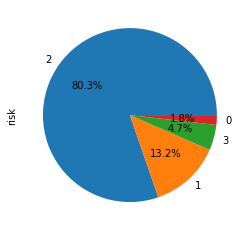

In [ ]:
#Getting the ditribution of the target variable risk
df.risk.value_counts().plot(kind='pie',autopct='%1.1f%%')

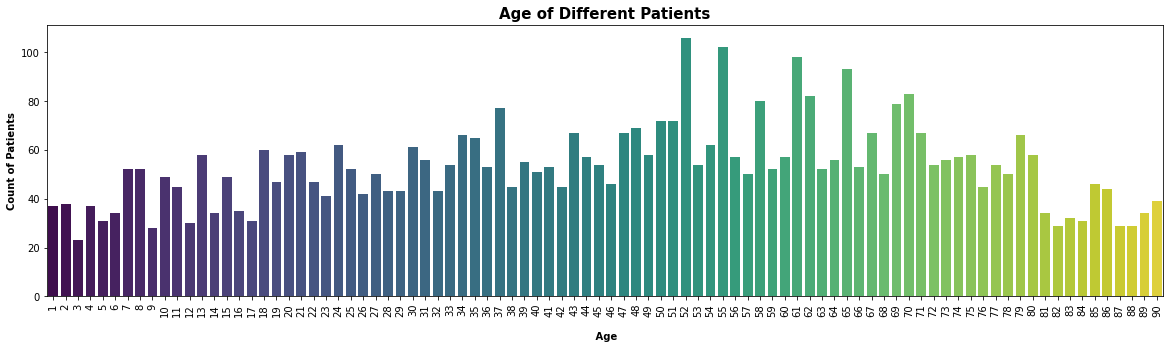

In [ ]:
#Getting distribution on the basis of age
fig, ax=plt.subplots(figsize=(20,5))
sns.countplot(x=df.age, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('\n Age', fontsize=10, fontweight='bold')
plt.ylabel('Count of Patients', fontsize=10, fontweight='bold')
plt.title('Age of Different Patients', fontweight = 'bold', fontsize='15')
plt.show()

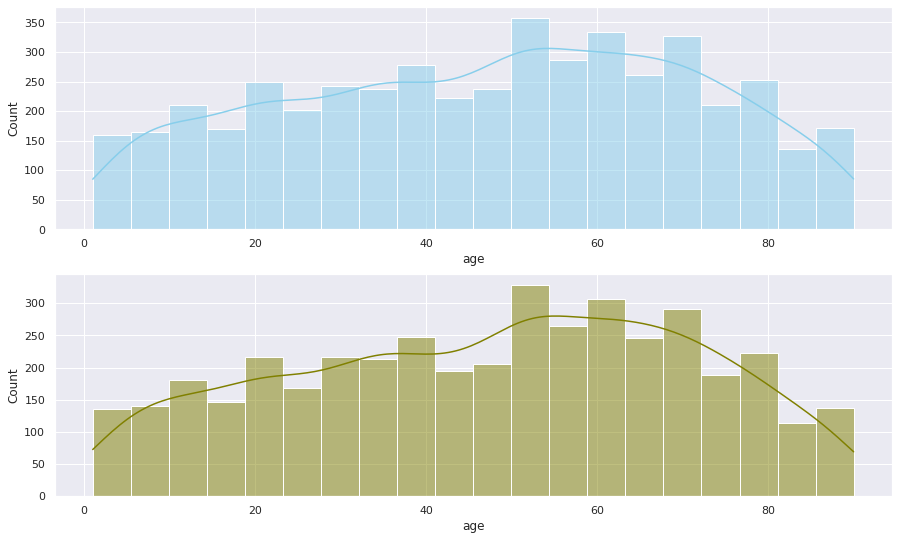

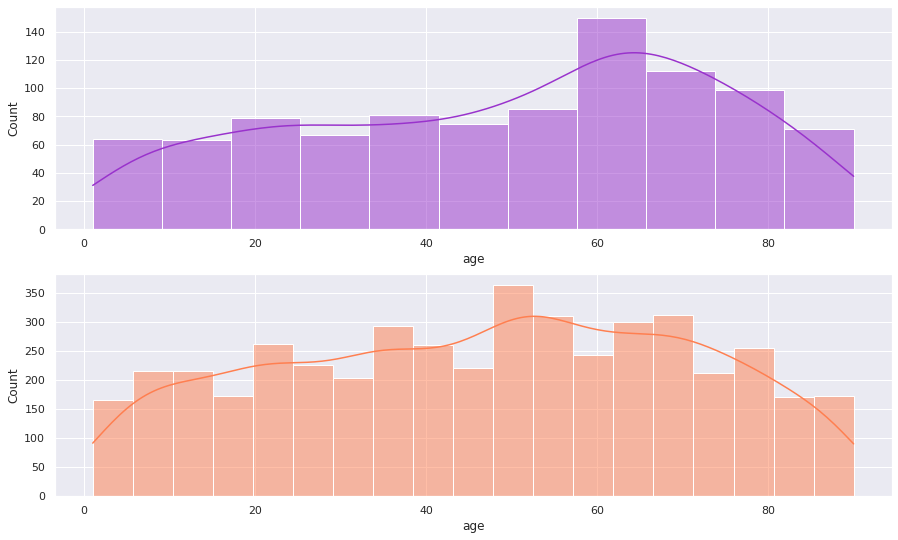

In [ ]:
#Getting the ages where stroke severity is higher
stroke_0 = df[~(df['risk'] == 0)]
stroke_1 = df[~(df['risk'] == 1)]
stroke_2 = df[~(df['risk'] == 2)]
stroke_3 = df[~(df['risk'] == 3)]
sns.set(style="darkgrid")
fig3, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 9))
fig4, (ax3, ax4) = plt.subplots(2,1, figsize=(15, 9))

sns.histplot(x=stroke_0['age'], kde=True, color="skyblue", ax=ax1)
sns.histplot(x=stroke_1['age'], kde=True, color="olive", ax=ax2)
sns.histplot(x=stroke_2['age'], kde=True, color="darkorchid", ax=ax3)
sns.histplot(x=stroke_3['age'], kde=True, color="coral", ax=ax4)

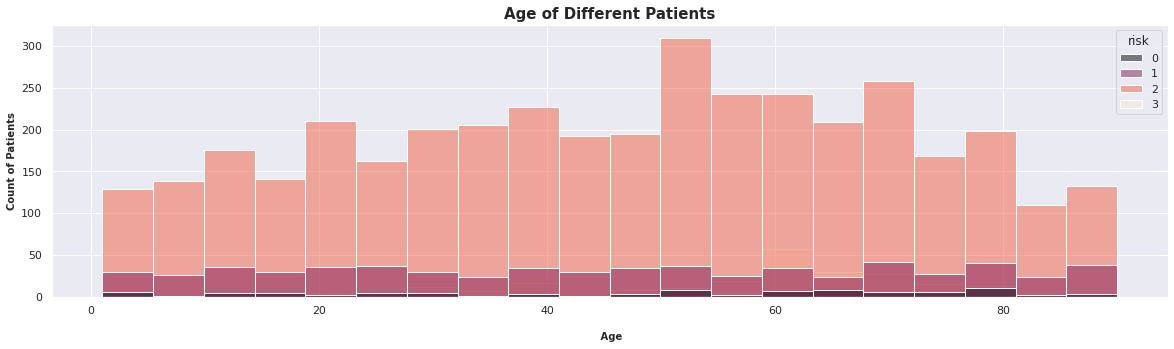

In [ ]:
#Getting the severity of strokes age-wise
fig4, ax=plt.subplots(figsize=(20,5))
legend = ['No Stroke', 'Stroke']
sns.set(style="darkgrid")
sns.histplot(x=df['age'], hue=df.risk, palette='rocket')
plt.xlabel('\n Age', fontsize=10, fontweight='bold')
plt.ylabel('Count of Patients', fontsize=10, fontweight='bold')
plt.title('Age of Different Patients', fontweight = 'bold', fontsize='15')
plt.show()  

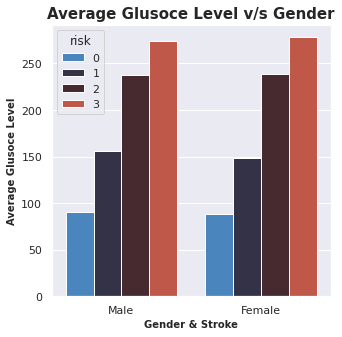

In [ ]:
#Getting average glucose levels across genders
fig11, ax = plt.subplots(figsize=(5, 5))
sns.set(style="darkgrid")

sns.barplot(x=df.gender,y=df.glucose,hue=df.risk,estimator=np.average ,ci=None,palette='icefire')
plt.xlabel('Gender & Stroke',fontsize=10, fontweight='bold')
plt.ylabel('Average Glusoce Level',fontsize=10, fontweight='bold')
plt.title('Average Glusoce Level v/s Gender',fontsize=15, fontweight='bold')


plt.show()  

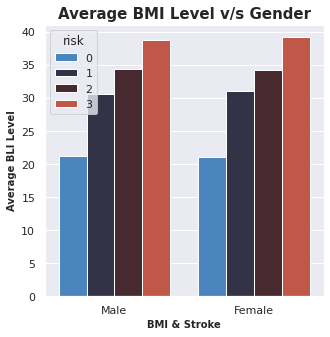

In [ ]:
#Getting average BMI levels across genders
fig11, ax = plt.subplots(figsize=(5, 5))
sns.set(style="darkgrid")

sns.barplot(x=df.gender,y=df.bmi,hue=df.risk,estimator=np.average ,ci=None,palette='icefire')
plt.xlabel('BMI & Stroke',fontsize=10, fontweight='bold')
plt.ylabel('Average BLI Level',fontsize=10, fontweight='bold')
plt.title('Average BMI Level v/s Gender',fontsize=15, fontweight='bold')


plt.show()  

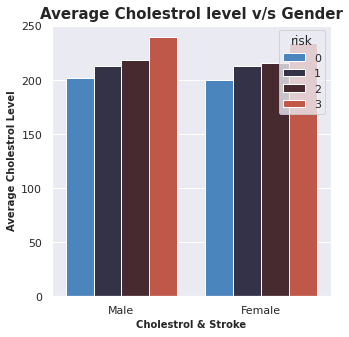

In [ ]:
#Getting average Cholestrol levels across genders
fig11, ax = plt.subplots(figsize=(5, 5))
sns.set(style="darkgrid")

sns.barplot(x=df.gender,y=df.cholestrol,hue=df.risk,estimator=np.average ,ci=None,palette='icefire')
plt.xlabel('Cholestrol & Stroke',fontsize=10, fontweight='bold')
plt.ylabel('Average Cholestrol Level',fontsize=10, fontweight='bold')
plt.title('Average Cholestrol level v/s Gender',fontsize=15, fontweight='bold')


plt.show()  

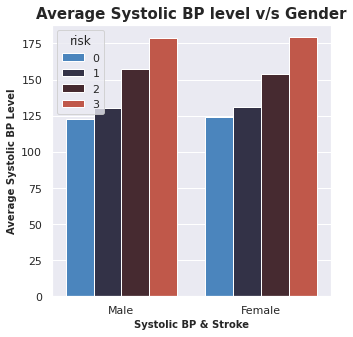

In [ ]:
#Getting average Systolic blood pressure levels across genders
fig11, ax = plt.subplots(figsize=(5, 5))
sns.set(style="darkgrid")

sns.barplot(x=df.gender,y=df.systolic,hue=df.risk,estimator=np.average ,ci=None,palette='icefire')
plt.xlabel('Systolic BP & Stroke',fontsize=10, fontweight='bold')
plt.ylabel('Average Systolic BP Level',fontsize=10, fontweight='bold')
plt.title('Average Systolic BP level v/s Gender',fontsize=15, fontweight='bold')


plt.show()  

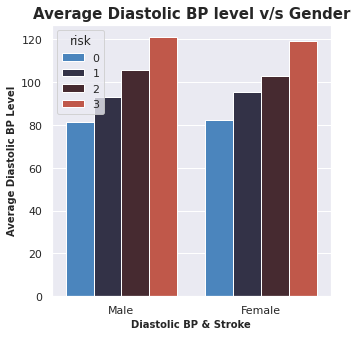

In [ ]:
#Getting average Diastolic blood pressure levels across genders
fig11, ax = plt.subplots(figsize=(5, 5))
sns.set(style="darkgrid")

sns.barplot(x=df.gender,y=df.diastolic,hue=df.risk,estimator=np.average ,ci=None,palette='icefire')
plt.xlabel('Diastolic BP & Stroke',fontsize=10, fontweight='bold')
plt.ylabel('Average Diastolic BP Level',fontsize=10, fontweight='bold')
plt.title('Average Diastolic BP level v/s Gender',fontsize=15, fontweight='bold')


plt.show()  

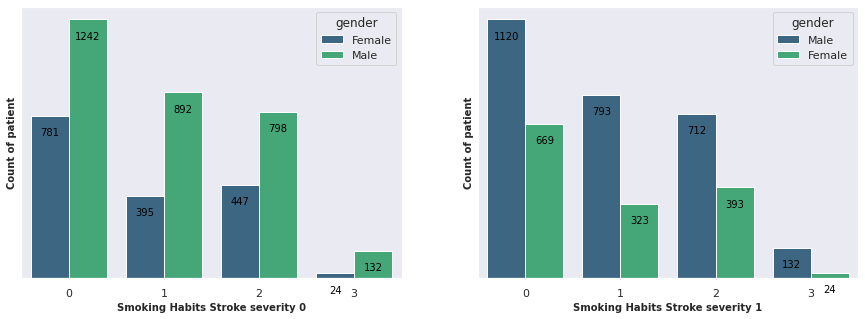

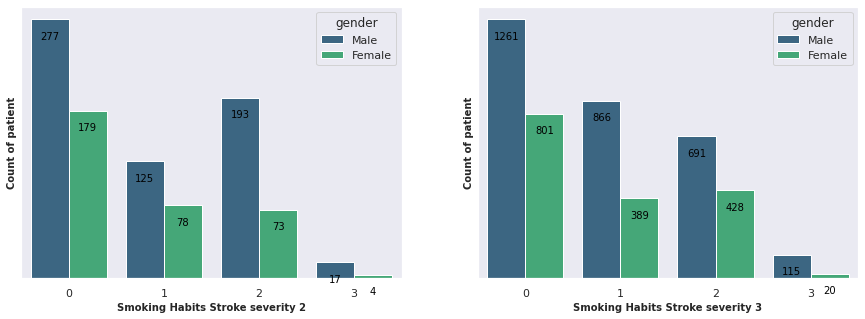

In [ ]:
#Smoking habits of male and females vs stroke severity
fig13, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig14, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x=stroke_0.smoking,hue=stroke_0.gender, palette='viridis',ax=ax1)
ax1.set_xlabel('Smoking Habits Stroke severity 0',fontsize=10, fontweight='bold')
ax1.set_yticks([])
ax1.set_ylabel('Patients',fontsize=10, fontweight='bold')
ax1.set_ylabel('Count of patient')
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)


sns.countplot(x=stroke_1.smoking,hue=stroke_1.gender, palette='viridis',ax=ax2)
ax2.set_xlabel('Smoking Habits Stroke severity 1',fontsize=10, fontweight='bold')
ax2.set_yticks([])
ax2.set_ylabel('Patients',fontsize=10, fontweight='bold')
ax2.set_ylabel('Count of patient')
for p in ax2.patches:
    ax2.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)

sns.countplot(x=stroke_2.smoking,hue=stroke_2.gender, palette='viridis',ax=ax3)
ax3.set_xlabel('Smoking Habits Stroke severity 2',fontsize=10, fontweight='bold')
ax3.set_yticks([])
ax3.set_ylabel('Patients',fontsize=10, fontweight='bold')
ax3.set_ylabel('Count of patient')
for p in ax3.patches:
    ax3.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)


sns.countplot(x=stroke_3.smoking,hue=stroke_3.gender, palette='viridis',ax=ax4)
ax4.set_xlabel('Smoking Habits Stroke severity 3',fontsize=10, fontweight='bold')
ax4.set_yticks([])
ax4.set_ylabel('Patients',fontsize=10, fontweight='bold')
ax4.set_ylabel('Count of patient')
for p in ax4.patches:
    ax4.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)




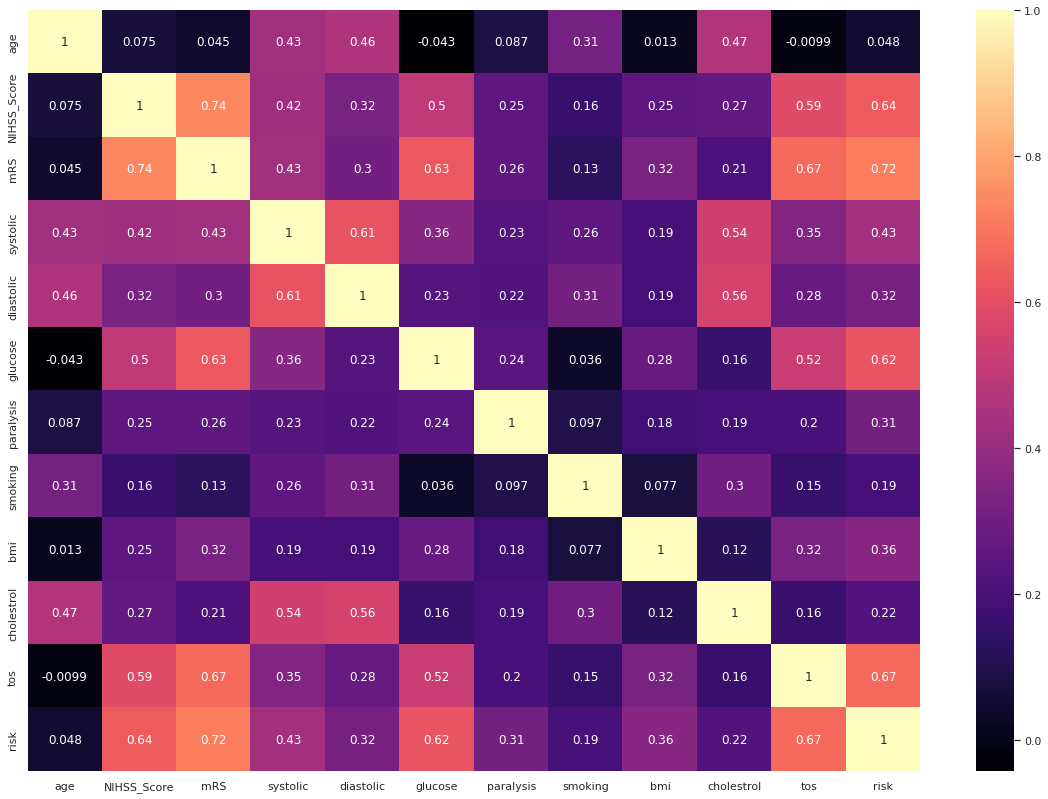

In [ ]:
#Getting correlation of variables
fig15,ax1 = plt.subplots(figsize=(20,14))
sns.heatmap(df.corr(), annot = True, cmap='magma',ax=ax1)

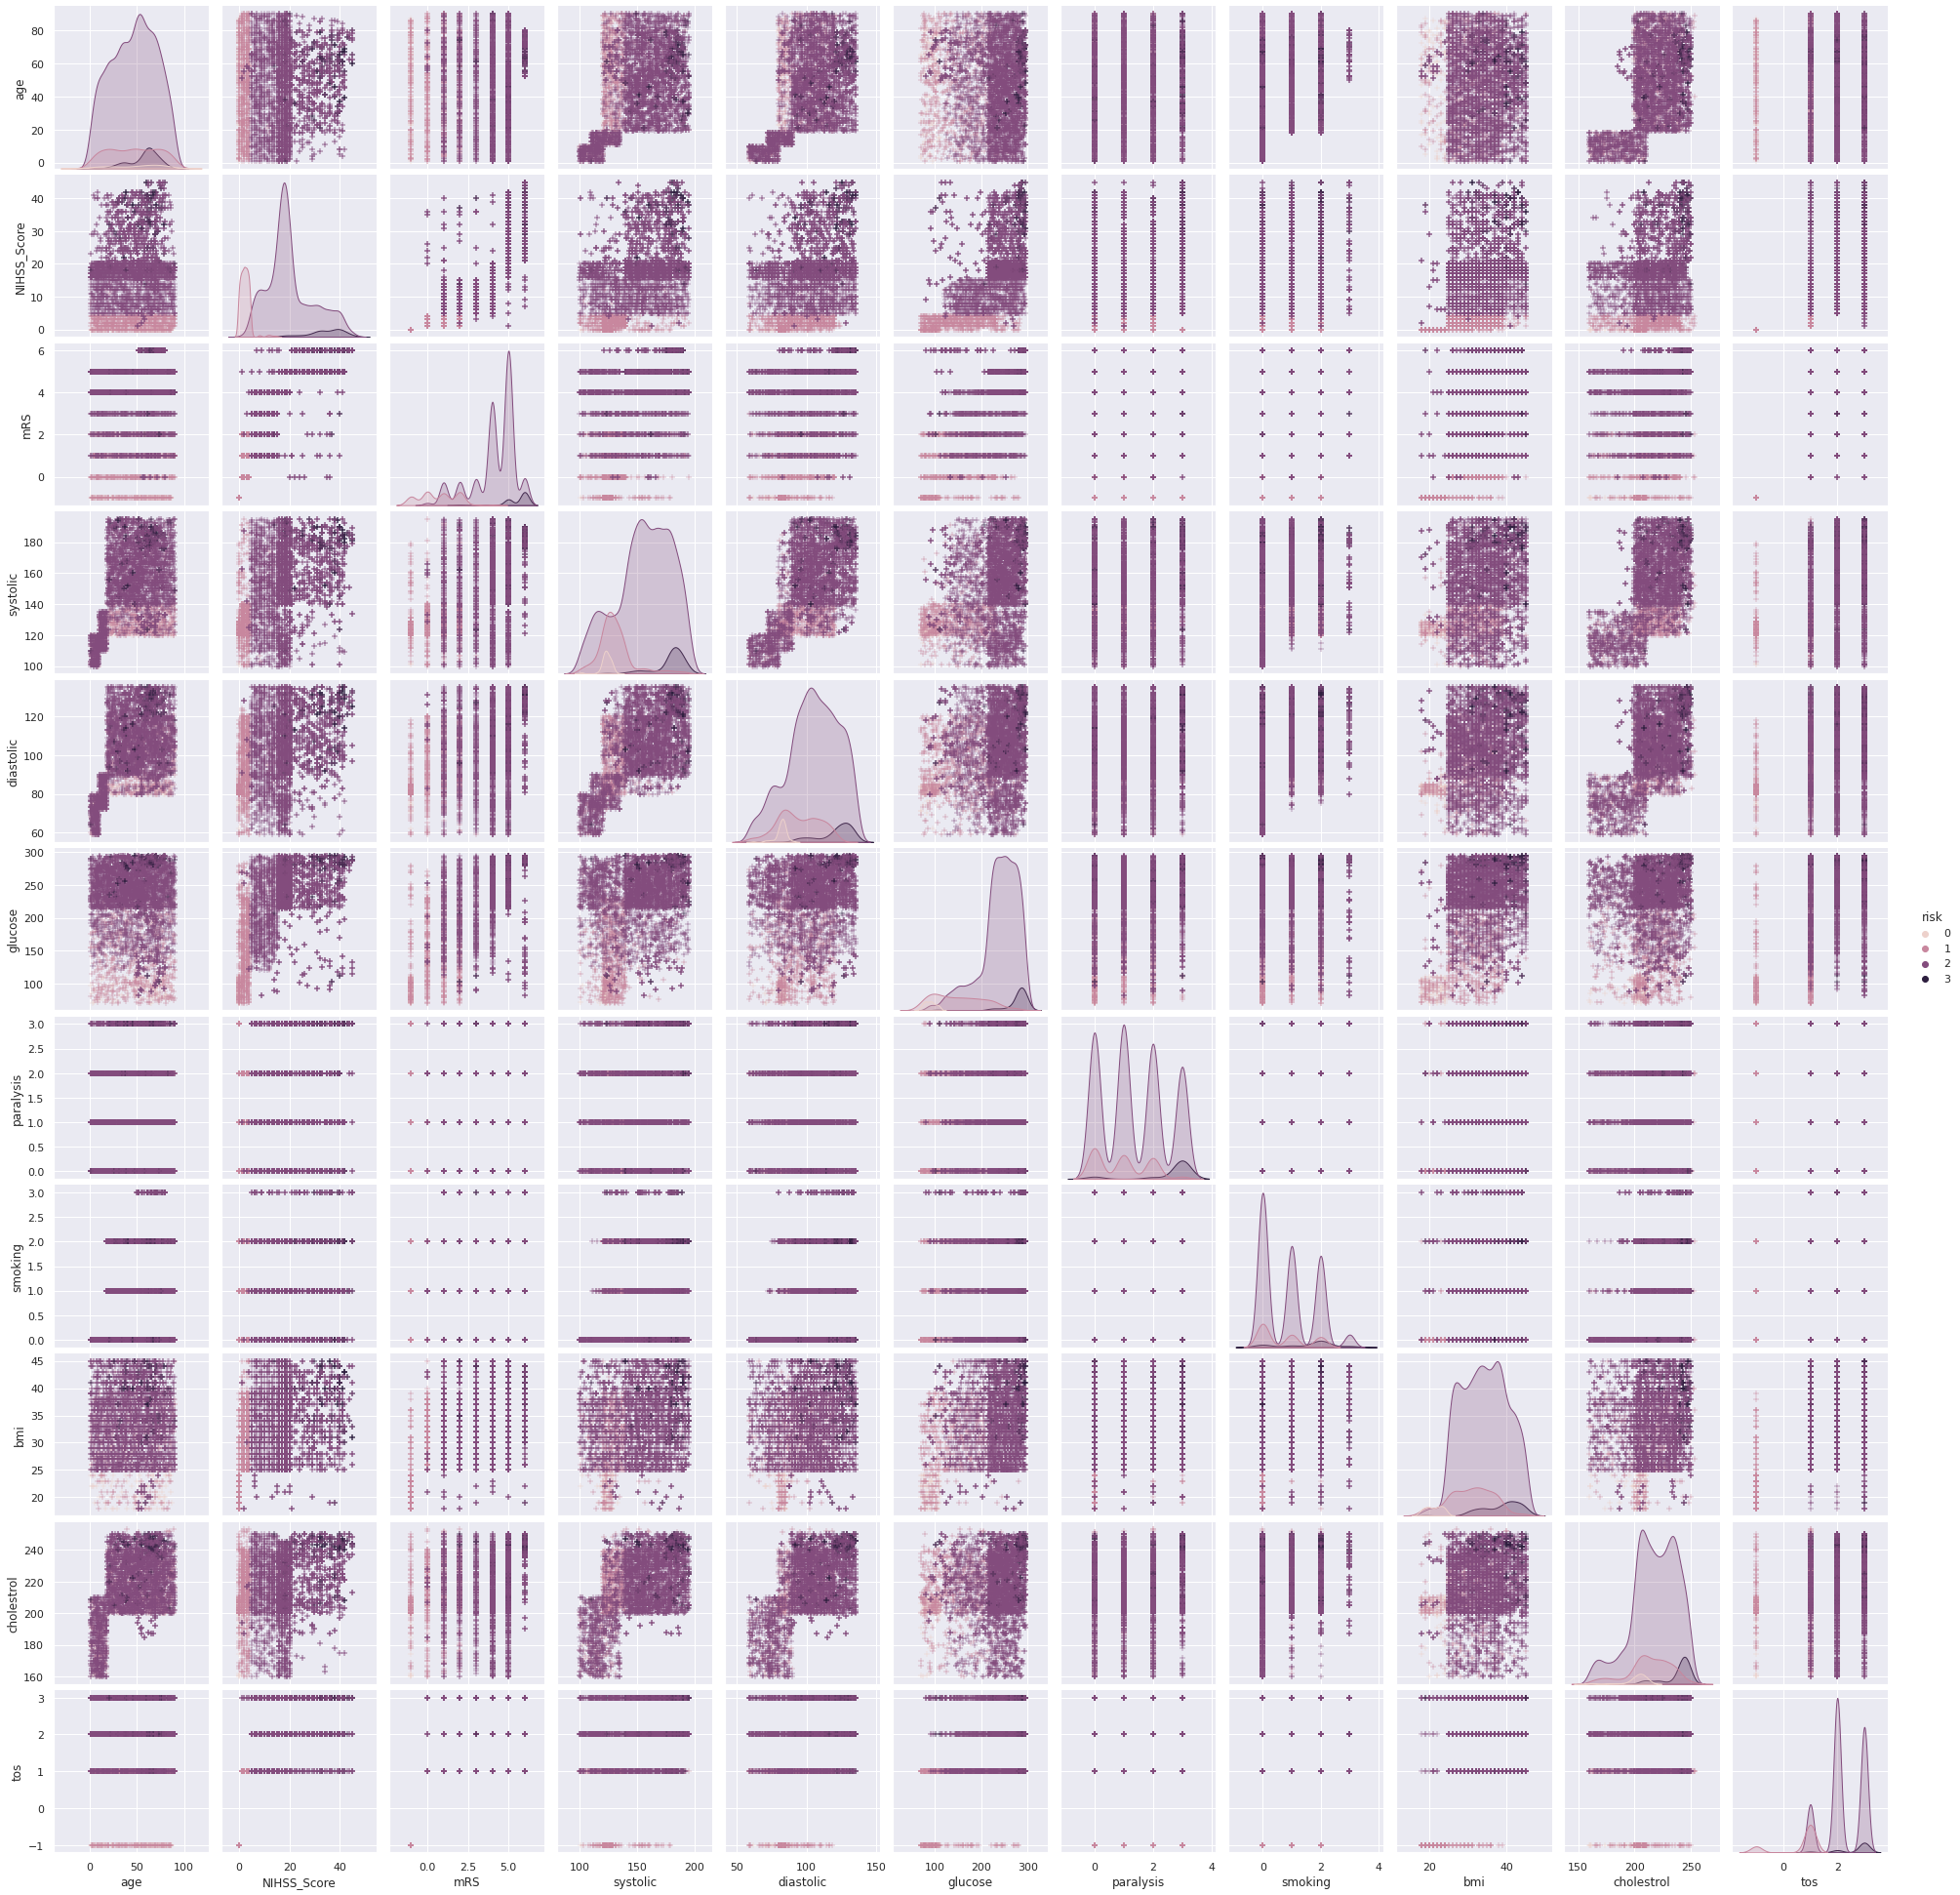

In [ ]:

#Pair plots visualization

g = sns.pairplot(df, hue='risk', markers='+')

plt.show()

# Preprocessing

One Hot Encoding 'gender' into Male and Female dropping gender column

In [5]:
m = {"Male": 1, "Female": 0}
f = {"Male": 0, "Female": 1}
df.insert(1, "Female", df['gender'].map(f), True)
df.insert(1, "Male", df['gender'].map(m), True)
# dropping gender column
df.drop(['gender'], axis=1, inplace=True)
print(df)

      age  Male  Female  NIHSS_Score  mRS  ...  smoking  bmi  cholestrol  tos  risk
0      61     1       0            0   -1  ...        0   22         200   -1     0
1      75     1       0            0   -1  ...        0   20         208   -1     0
2      73     1       0            0   -1  ...        0   20         208   -1     0
3      63     0       1            0   -1  ...        0   20         210   -1     0
4      23     1       0            0   -1  ...        0   22         201   -1     0
...   ...   ...     ...          ...  ...  ...      ...  ...         ...  ...   ...
4793   67     1       0           13    6  ...        2   39         219    3     2
4794   67     0       1           20    3  ...        2   22         187    1     2
4795   65     1       0            6    4  ...        3   23         233    3     2
4796   64     1       0           19    5  ...        2   28         244    1     2
4797   65     1       0            5    1  ...        3   27         231    

In [6]:
zero = df[df['risk']==0]
one = df[df['risk']==1]
two = df[df['risk']==2]
three = df[df['risk']==3]
print("Risk 0:", zero.shape[0])
print("Risk 1:", one.shape[0])
print("Risk 2:", two.shape[0])
print("Risk 3:", three.shape[0])

y = df.values[:, -1].reshape(df.values.shape[0], 1)
X = df.values[:, :-1]





Risk 0: 87
Risk 1: 632
Risk 2: 3852
Risk 3: 227


In [7]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)

[[0.6741573  1.         0.         ... 0.14814815 0.43010753 0.        ]
 [0.83146067 1.         0.         ... 0.07407407 0.51612903 0.        ]
 [0.80898876 1.         0.         ... 0.07407407 0.51612903 0.        ]
 ...
 [0.71910112 1.         0.         ... 0.18518519 0.78494624 1.        ]
 [0.70786517 1.         0.         ... 0.37037037 0.90322581 0.5       ]
 [0.71910112 1.         0.         ... 0.33333333 0.76344086 1.        ]]


In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Naive Bayes (Complement)

In [ ]:
def nb_test(model,x_train,y_train):
  
  print("\n parameters: ")
  #it gives us the default parameters since those are the ones used 
  print( model.get_params(deep=True))
  print("\n log-probability estimates: ")
  print(model.predict_log_proba(x_train))
  print("\n probability estimates: ")
  print(model.predict_proba(x_train))



 parameters: 
{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'norm': False}

 log-probability estimates: 
[[-1.56799849 -1.62523136 -0.95967372 -1.55280223]
 [-1.47100044 -1.50080802 -1.1606799  -1.45208647]
 [-1.31082563 -1.2325679  -1.68513969 -1.37262371]
 ...
 [-1.56102345 -1.61972373 -0.96278037 -1.55924055]
 [-1.49510301 -1.53340099 -1.10447922 -1.47582266]
 [-1.53533725 -1.59301137 -1.03686163 -1.48395648]]

 probability estimates: 
[[0.208462   0.19686612 0.38301784 0.21165404]
 [0.22969557 0.22294994 0.31327311 0.23408137]
 [0.26959738 0.29154296 0.18541853 0.25344113]
 ...
 [0.20992112 0.19795338 0.38182978 0.21029572]
 [0.22422551 0.21580048 0.33138341 0.2285906 ]
 [0.21538304 0.20331244 0.3545657  0.22673882]]

 accuracy:  0.7895833333333333

 Confusion Matrix: 
[[  0  16   0   0]
 [  0 130   8   0]
 [  0 109 627  24]
 [  0   1  44   1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0

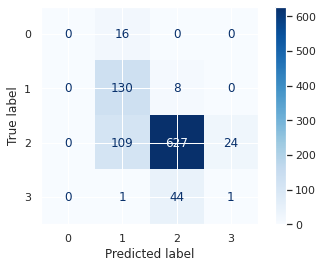

In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import cohen_kappa_score
#Complement Naive Bayes classifier: particularly suited for imbalanced data sets
#designed to correct the “severe assumptions” made by the standard Multinomial Naive Bayes classifier
#In complement Naive Bayes, instead of calculating the probability of an item belonging to a certain class,
#we calculate the probability of the item belonging to all the classes.
Cmodel = ComplementNB()
Cmodel.fit(x_train,y_train.ravel())
train_pred_c=Cmodel.predict(x_train)
test_pred_c=Cmodel.predict(x_test)
import warnings
warnings.filterwarnings('error')  # ignoring warning or not showing them more than once
warnings.filterwarnings('ignore')
nb_test(Cmodel,x_train,y_train)

print("\n accuracy: ",accuracy_score(y_test, test_pred_c))
cm=confusion_matrix(y_test,test_pred_c)
print("\n Confusion Matrix: ")
print(cm)
sklearn.metrics.plot_confusion_matrix(Cmodel,x_test,y_test,cmap=plt.cm.Blues)
print(classification_report(y_test, test_pred_c))
#print("Cohen Kappa Score",cohen_kappa_score(y_test, test_pred_c))



#OverSampling

In [9]:
smk = SMOTETomek(random_state=42)
X, y = smk.fit_resample(X, y)
print(X)
print("After Oversampling:")
print("Risk", Counter(y))

[[0.6741573  1.         0.         ... 0.14814815 0.43010753 0.        ]
 [0.83146067 1.         0.         ... 0.07407407 0.51612903 0.        ]
 [0.80898876 1.         0.         ... 0.07407407 0.51612903 0.        ]
 ...
 [0.57303371 1.         0.         ... 0.91952751 0.61886899 1.        ]
 [0.69662921 0.         1.         ... 0.96296296 0.88172043 1.        ]
 [0.7752809  1.         0.         ... 0.74074074 0.91397849 1.        ]]
After Oversampling:
Risk Counter({0: 3851, 3: 3851, 1: 3850, 2: 3850})


In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Logistic Regression


Confusion Matrix:
 [[795   0   0   0]
 [ 83 699  11   0]
 [  0  18 625  73]
 [  0   0  29 748]]
Accuracy: 93.05420318078545
Precision: 0.9328240089464747
Recall: 0.9292611975263775
F1 Score: 0.9293819382433228


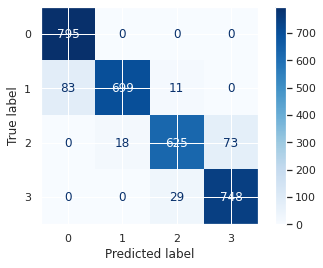

In [ ]:
# para = {}
# grid_classifier = GridSearchCV(LogisticRegressionCV(), para)

classifier = LogisticRegressionCV(cv=5, random_state = 0, max_iter=1000)
classifier.fit(x_train, y_train.ravel())
y_pred = classifier.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
sklearn.metrics.plot_confusion_matrix(classifier,x_test,y_test,cmap=plt.cm.Blues)

# Random Forest

In [ ]:
# using the feature importance variable
model = RandomForestClassifier(n_estimators = 100)
feature_names=df.columns[:-1]
# Train the model using the training sets
model.fit(x_train, y_train)
feature_imp = pd.Series(model.feature_importances_,index=feature_names ).sort_values(ascending = False)
feature_imp

NIHSS_Score    0.232721
tos            0.126347
bmi            0.126228
mRS            0.116398
glucose        0.097961
systolic       0.080692
paralysis      0.066406
cholestrol     0.059491
diastolic      0.044202
age            0.023455
smoking        0.021836
Male           0.002139
Female         0.002124
dtype: float64

accuracy 0.9805258033106135
Confusion matrix
[[795   0   0   0]
 [ 40 749   4   0]
 [  0   0 708   8]
 [  0   0   8 769]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       795
           1       1.00      0.94      0.97       793
           2       0.98      0.99      0.99       716
           3       0.99      0.99      0.99       777

    accuracy                           0.98      3081
   macro avg       0.98      0.98      0.98      3081
weighted avg       0.98      0.98      0.98      3081

score 0.9805258033106135
precision 0.9812832828551392
recall 0.9807613268094997


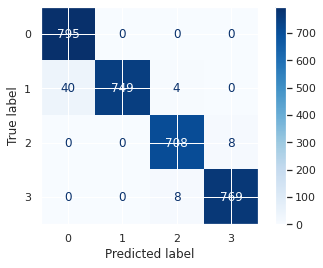

In [ ]:
def performance(y_test,y_pred):
  print("accuracy",accuracy_score(y_test, y_pred))
  cm=confusion_matrix(y_test,y_pred)
  print("Confusion matrix")
  print(cm)
  print(classification_report(y_test, y_pred))
  report = classification_report(y_test, y_pred,output_dict=True )
  return report

model = RandomForestClassifier(criterion='gini')
model.fit(x_train, y_train.ravel())
yhat = model.predict(x_test)
report=performance(y_test,yhat)
sklearn.metrics.plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)
print("score",model.score(x_test,y_test))
print("precision",sklearn.metrics.precision_score(y_test,yhat,average="macro"))
print("recall",sklearn.metrics.recall_score(y_test,yhat,average="macro"))

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
#criterion':['gini','entropy'], 'max_depth': [20], 'random_state':[23],
param_grid = {'criterion':['gini','entropy'],
              'random_state':[23],
              'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, None]}

GS_RF=GridSearchCV(RandomForestClassifier(), param_grid)
GS_RF.fit(x_train,y_train.ravel())
print(GS_RF.best_params_)
print(GS_RF.score(x_test,y_test))
#{'random_state': 23, 'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'criterion': 'gini', 'bootstrap': False}



{'bootstrap': False, 'criterion': 'gini', 'max_depth': 40, 'random_state': 23}
0.9847452125933138


accuracy 0.9814995131450828
Confusion matrix
[[795   0   0   0]
 [ 37 752   4   0]
 [  0   0 707   9]
 [  0   0   7 770]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       795
           1       1.00      0.95      0.97       793
           2       0.98      0.99      0.99       716
           3       0.99      0.99      0.99       777

    accuracy                           0.98      3081
   macro avg       0.98      0.98      0.98      3081
weighted avg       0.98      0.98      0.98      3081

score 0.9814995131450828
precision 0.9821638096161343
recall 0.9816796906560163
F! Score 0.9816229409695858


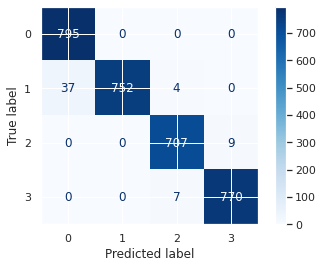

In [ ]:
def performance(y_test,y_pred):
  print("accuracy",accuracy_score(y_test, y_pred))
  cm=confusion_matrix(y_test,y_pred)
  print("Confusion matrix")
  print(cm)
  print(classification_report(y_test, y_pred))
  report = classification_report(y_test, y_pred,output_dict=True )
  return report

# model = RandomForestClassifier(random_state= 23, n_estimators= 800, min_samples_split= 5, 
                              #  min_samples_leaf= 2, max_features= 'auto', max_depth=20, criterion= 'entropy', bootstrap= False)
model=RandomForestClassifier(bootstrap=True, criterion= 'entropy', max_depth= 20, random_state= 23)
model.fit(x_train, y_train.ravel())
yhat = model.predict(x_test)
report=performance(y_test,yhat)
sklearn.metrics.plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)
print("score",model.score(x_test,y_test))
print("precision",sklearn.metrics.precision_score(y_test,yhat,average="macro"))
print("recall",sklearn.metrics.recall_score(y_test,yhat,average="macro"))
print("F! Score",sklearn.metrics.f1_score(y_test,yhat,average="macro"))


[]

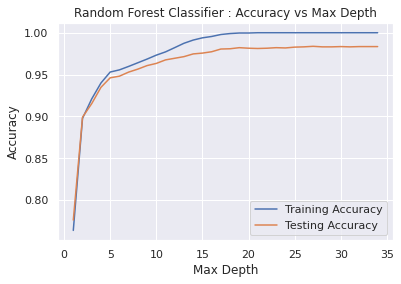

In [ ]:


rf_train_score=[]
rf_test_score=[]
for i in np.arange(1, 35):
  param_grid = {'criterion':['gini','entropy'],'max_depth': [i],'random_state':[23]}
  GS_RF=GridSearchCV(RandomForestClassifier(), param_grid,cv=5)
  GS_RF.fit(x_train,y_train.ravel())
  y_train_pred=GS_RF.predict(x_train)
  rf_train_score.append(accuracy_score(y_train,y_train_pred))
  y_pred=GS_RF.predict(x_test)
  rf_test_score.append(accuracy_score(y_test,y_pred))
  # print(rf_train_score,rf_test_score)
 
plt.title("Random Forest Classifier : Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.plot(np.arange(1,35),rf_train_score,label="Training Accuracy")
plt.plot(np.arange(1,35),rf_test_score,label="Testing Accuracy")
plt.legend()
plt.plot()


[]

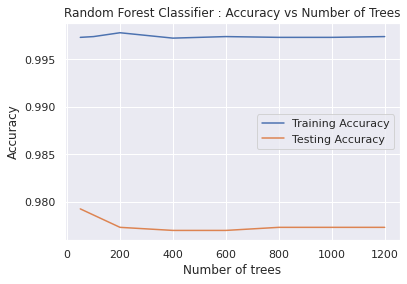

In [ ]:

rf_train_score=[]
rf_test_score=[]
n_esti=[50, 100, 200, 400, 600, 800, 1000, 1200]
for i in n_esti:
  param_grid = {'random_state': [23], 'n_estimators': [i], 'min_samples_split': [5],'min_samples_leaf': [2], 'max_depth':[20], 'criterion': ['entropy'], 'bootstrap': ['False']}
      # 'criterion':['gini','entropy'],'max_depth': [20], 'n_estimators': [i]}
  GS_RF=GridSearchCV(RandomForestClassifier(), param_grid,cv=5)
  GS_RF.fit(x_train,y_train.ravel())
  y_train_pred=GS_RF.predict(x_train)
  rf_train_score.append(accuracy_score(y_train,y_train_pred))
  y_pred=GS_RF.predict(x_test)
  rf_test_score.append(accuracy_score(y_test,y_pred))
  # print(rf_train_score,rf_test_score)
 
plt.title("Random Forest Classifier : Accuracy vs Number of Trees")
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.plot(n_esti,rf_train_score,label="Training Accuracy")
plt.plot(n_esti,rf_test_score,label="Testing Accuracy")
plt.legend()
plt.plot()



#Adaboost Classifier

In [ ]:
param_grid = {
              'learning_rate': [0.0001,0.001,0.01,0.1,0.3,0.5,0.7,0.9,1],
              'n_estimators': [4,8,10, 20, 30, 40, 50, 60, 70, 80, 90, 100,110,120]}

GS_RF=GridSearchCV(AdaBoostClassifier(), param_grid)
GS_RF.fit(x_train,y_train.ravel())
print(GS_RF.best_params_)
print(GS_RF.score(x_test,y_test))

{'learning_rate': 0.9, 'n_estimators': 30}
0.866601752677702


In [ ]:
def performance(y_test,y_pred):
  print("accuracy",accuracy_score(y_test, y_pred))
  cm=confusion_matrix(y_test,y_pred)
  print("Confusion matrix")
  print(cm)
  print(classification_report(y_test, y_pred))
  report = classification_report(y_test, y_pred,output_dict=True )
  return report

model=AdaBoostClassifier(learning_rate=0.5,n_estimators=10)
model.fit(x_train, y_train.ravel())
yhat = model.predict(x_test)
report=performance(y_test,yhat)
sklearn.metrics.plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)
print("score",model.score(x_test,y_test))
print("precision",sklearn.metrics.precision_score(y_test,yhat,average="macro"))
print("recall",sklearn.metrics.recall_score(y_test,yhat,average="macro"))
print("F1 Score",sklearn.metrics.f1_score(y_test,yhat,average="macro"))

#Naive Bayes (Gaussian)


In [ ]:
def nb_test(model,x_train,y_train):
  
  print("\n parameters: ")
  #it gives us the default parameters since those are the ones used 
  print( model.get_params(deep=True))
  print("\n log-probability estimates: ")
  print(model.predict_log_proba(x_train))
  print("\n probability estimates: ")
  print(model.predict_proba(x_train))



 parameters: 
{'priors': None, 'var_smoothing': 1e-09}

 log-probability estimates: 
[[ 0.00000000e+00 -6.01402539e+01 -8.79808478e+01 -1.93804551e+02]
 [-5.52493729e+09 -2.47651226e+02 -1.51566458e+00 -2.48028317e-01]
 [ 0.00000000e+00 -6.04372021e+01 -8.90075762e+01 -1.99155857e+02]
 ...
 [-2.03975988e+09 -6.23053460e-05 -9.68349448e+00 -7.82251890e+01]
 [-1.99016643e+09 -8.01201505e-06 -1.17345723e+01 -6.44079289e+01]
 [-5.91405708e+09 -2.03091547e+02 -3.89597130e-04 -7.85059214e+00]]

 probability estimates: 
[[1.00000000e+000 7.61061252e-027 6.17167820e-039 6.78817052e-085]
 [0.00000000e+000 2.79536888e-108 2.19662154e-001 7.80337846e-001]
 [1.00000000e+000 5.65531277e-027 2.21055229e-039 3.21892061e-087]
 ...
 [0.00000000e+000 9.99937697e-001 6.23034051e-005 1.06471185e-034]
 [0.00000000e+000 9.99991988e-001 8.01198295e-006 1.06657617e-028]
 [0.00000000e+000 6.28726595e-089 9.99610479e-001 3.89521247e-004]]
accuracy 0.9032781564427134
Precision: 0.9036684623422738
Recall: 0.9015

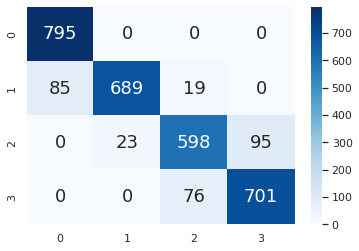

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
Gmodel=GaussianNB()
Gmodel.fit(x_train,y_train.ravel())
train_pred_gau=Gmodel.predict(x_train)
test_pred_gau=Gmodel.predict(x_test)

nb_test(Gmodel,x_train,y_train)
#cm = confusion_matrix(y_test, test_pred_gau)
#print(cm)
#performance(y_test,test_pred_gau)
print("accuracy",accuracy_score(y_test, test_pred_gau))
print("Precision:", precision_score(y_test, test_pred_gau, average='macro'))
print("Recall:", recall_score(y_test, test_pred_gau, average='macro'))
print("F1 Score:", f1_score(y_test, test_pred_gau, average='macro'))
print("Cohen Kappa Score",cohen_kappa_score(y_test, test_pred_gau))
cm=confusion_matrix(y_test,test_pred_gau)
print("\n Confusion Matrix: ")
#print(cm)
#sklearn.metrics.plot_confusion_matrix(Gmodel,x_test,y_test,cmap=plt.cm.Blues)
print(classification_report(y_test, test_pred_gau))

sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 18}, fmt='g')

#Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
 # Model Accuracy, how often is the classifier correct?
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
def performance(y_test,y_pred):
  print("accuracy",accuracy_score(y_test, y_pred))
  cm=confusion_matrix(y_test,y_pred)
  print(cm)
  print(classification_report(y_test, y_pred))
  from sklearn.metrics import cohen_kappa_score
  print("Cohen Kappa Score",cohen_kappa_score(y_test, y_pred))
performance(y_test, y_pred)

accuracy 0.9756572541382668
[[789   6   0   0]
 [ 27 760   6   0]
 [  0  10 694  12]
 [  0   0  14 763]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       795
           1       0.98      0.96      0.97       793
           2       0.97      0.97      0.97       716
           3       0.98      0.98      0.98       777

    accuracy                           0.98      3081
   macro avg       0.98      0.98      0.98      3081
weighted avg       0.98      0.98      0.98      3081

Cohen Kappa Score 0.9675231768496013


In [ ]:
!pip install graphviz
!pip install pydotplus
!pip install --upgrade scikit-learn==0.20.3

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = df.columns[:-1],class_names=['0','1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# SVM


In [14]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
def performance(y_test,y_pred):
  print("accuracy",accuracy_score(y_test, y_pred))
  cm=confusion_matrix(y_test,y_pred)
  print(cm)
  print(classification_report(y_test, y_pred))
  from sklearn.metrics import cohen_kappa_score
  print("Cohen Kappa Score",cohen_kappa_score(y_test, y_pred))


In [18]:
y_test

array([3, 2, 2, ..., 3, 0, 1])

In [23]:
#Linear kernel
from sklearn import svm
SVM_object = make_pipeline(svm.SVC(kernel='linear'))
SVM_object.fit(x_train,y_train)
y_pred=SVM_object.predict(x_test)
performance(y_test, y_pred)

accuracy 0.9302174618630314
[[795   0   0   0]
 [ 93 688  12   0]
 [  0  13 627  76]
 [  0   0  21 756]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       795
           1       0.98      0.87      0.92       793
           2       0.95      0.88      0.91       716
           3       0.91      0.97      0.94       777

    accuracy                           0.93      3081
   macro avg       0.93      0.93      0.93      3081
weighted avg       0.93      0.93      0.93      3081

Cohen Kappa Score 0.9068553945872736


In [24]:
#Best kernel Performance using Grid Search
param_grid = {'kernel':['linear','poly','sigmoid','rbf'],'gamma':['scale','auto'],'random_state':[1,2,3]}
GS_SVM=GridSearchCV(svm.SVC(), param_grid,cv=5)
GS_SVM.fit(x_train,y_train)
GS_SVM.best_params_

{'gamma': 'scale', 'kernel': 'poly', 'random_state': 1}

In [25]:
GS_SVM.score(x_test,y_test)

0.9480688088283025

In [ ]:
#Error vs Kernel plot
dt_train_score=[]
dt_test_score=[]
for i in ['linear','poly','sigmoid','rbf']:
  param_grid = {'kernel':[i],'gamma':['scale','auto'],'random_state':[1,2,3]}
  GS_SVM=GridSearchCV(svm.SVC(), param_grid,cv=5)
  GS_SVM.fit(x_train,y_train)
  y_train_pred=GS_SVM.predict(x_train)
  y_pred=GS_SVM.predict(x_test)
  dt_train_score.append(accuracy_score(y_train,y_train_pred))
  dt_test_score.append(accuracy_score(y_test,y_pred))


[]

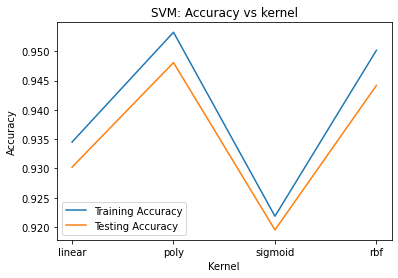

In [27]:
#Accuracy vs kernel
plt.title("SVM: Accuracy vs kernel")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.plot(['linear','poly','sigmoid','rbf'],dt_train_score,label="Training Accuracy")
plt.plot(['linear','poly','sigmoid','rbf'],dt_test_score,label="Testing Accuracy")
plt.legend()
plt.plot()